In [1]:
import pandas as pd
from pandas_plink import read_plink1_bin
import numpy as np
import matplotlib.pyplot as plt
import os

## Data Prep

Import our gene expression data

In [2]:
expression = pd.read_csv("/Users/kevinmbp/Desktop/DSC180/GD462.GeneQuantRPKM.50FN.samplename.resk10.txt.gz", delimiter='\t')

We then combine the entire genomic data bfiles to do the trian and test split


plink --bfile LDREF/1000G.EUR.1 --merge-list merge_list.txt --make-bed --out 1000G_combined

In [5]:
G = read_plink1_bin("data/1000G_combined.bed", "data/1000G_combined.bim", "data/1000G_combined.fam", verbose=False)

In [36]:
gene_annot = pd.read_csv('data/gene_annotation.txt', delimiter='\t')
gene_annot

,ID,CHR,START,STOP,SYM,TYPE
0,DDX11L1,1,11868,13052,ENSG00000223972,transcribed_unprocessed_pseudogene
1,OR4F5,1,69090,70008,ENSG00000186092,protein_coding
2,FAM87B,1,817370,819834,ENSG00000177757,lincRNA
3,LINC00115,1,826205,827522,ENSG00000225880,lincRNA
4,LINC01128,1,827607,859446,ENSG00000228794,processed_transcript
...,...,...,...,...,...,...
20495,ARSA,22,50622753,50628179,ENSG00000100299,protein_coding
20496,SHANK3,22,50674414,50733298,ENSG00000251322,protein_coding
20497,ACR,22,50738195,50745334,ENSG00000100312,protein_coding
20498,RPL23AP82,22,50756947,50801309,ENSG00000184319,transcribed_unprocessed_pseudogene


In [52]:
expression['gene'] = [i[0] for i in expression['TargetID'].str.split('.')]
expression

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828,gene
0,ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.101858,0.078110,0.048981,0.118597,0.004035,0.010925,...,0.240010,0.137175,0.148494,0.038643,0.088509,0.029204,0.024423,0.044816,0.139186,ENSG00000152931
1,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.183805,5.686911,2.434653,3.830894,6.612288,4.709646,...,6.094500,12.536000,2.217262,3.573394,7.583364,4.052882,1.570378,4.900372,6.737308,ENSG00000183696
2,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.199910,1.573572,0.521616,1.447225,3.565791,1.982681,...,1.996067,2.854923,2.267343,1.331201,2.187895,1.004250,3.003316,1.984362,1.684954,ENSG00000139269
3,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831940,0.069778,0.931086,0.620941,1.660668,0.570481,...,1.127852,0.774409,1.495854,0.895342,1.513521,0.826377,1.021201,0.952502,0.740565,ENSG00000169129
4,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.646422,24.395572,16.445374,24.806650,25.113349,19.233988,...,28.725528,24.450520,27.264069,26.912814,29.509210,26.462331,25.624009,25.707741,22.824957,ENSG00000134602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23717,ENSG00000235472.1,ENSG00000235472.1,13,29172970,31.582832,34.071123,19.394365,37.523721,33.430473,37.844966,...,33.224977,39.827675,27.096811,34.686342,37.386766,30.598840,33.516674,32.017940,38.341888,ENSG00000235472
23718,ENSG00000114423.14,ENSG00000114423.14,3,105588396,14.054749,14.477899,11.584425,12.637956,12.015089,13.750655,...,9.900372,10.473115,13.433413,15.832594,19.216176,10.213739,14.563192,15.637732,8.357117,ENSG00000114423
23719,ENSG00000243312.2,ENSG00000243312.2,4,87791344,1.112114,0.831797,0.253228,0.271568,0.486086,1.362640,...,0.645389,0.819469,0.515448,0.463054,1.580658,0.701396,0.771233,0.857330,0.703369,ENSG00000243312
23720,ENSG00000257337.1,ENSG00000257337.1,12,53448222,3.826396,6.045798,2.593872,4.447169,5.294657,4.106823,...,6.017795,3.460273,3.905032,5.023161,5.333027,5.694370,8.142939,5.622043,6.026476,ENSG00000257337


In [15]:
## Looking for overlap of population between bfiles and gene expresion data

pop_bfile = np.array(G.sample)
pop_gene_exp = np.array(expression.columns)

overlap = np.intersect1d(pop_bfile, pop_gene_exp)

print('the length of the overlap is :', len(pop_gene_exp))

the length of the overlap is : 466


In [ ]:
np.random.shuffle(overlap)

# Compute the split index for 75% training and 25% testing
split_index = int(len(overlap) * 0.75)

# Split the data
training_set = overlap[:split_index]
testing_set = overlap[split_index:]

489

## Split the trian and test data

Now we can choose the overlap array, split the train and test file by using plink

In [25]:
def write_to_file(filename, data):
    with open(filename, "w") as f:
        for element in data:
            f.write(f"{element} {element}\n")
            
write_to_file("train_ids.txt", training_set)
write_to_file("test_ids.txt", testing_set)

In [27]:
!./plink --bfile data/1000G_combined --keep train_ids.txt --make-bed --out data/train_combined

PLINK v1.9.0-b.7.6 64-bit (13 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/train_combined.log.
Options in effect:
  --bfile data/1000G_combined
  --keep train_ids.txt
  --make-bed
  --out data/train_combined

32768 MB RAM detected; reserving 16384 MB for main workspace.
1190321 variants loaded from .bim file.
489 people (0 males, 0 females, 489 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data/train_combined.nosex .
--keep: 258 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 258 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate in remaining samples is exactly 1.
1190321 variants and 258 people pass

In [28]:
!./plink --bfile data/1000G_combined --keep test_ids.txt --make-bed --out data/test_combined

PLINK v1.9.0-b.7.6 64-bit (13 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/test_combined.log.
Options in effect:
  --bfile data/1000G_combined
  --keep test_ids.txt
  --make-bed
  --out data/test_combined

32768 MB RAM detected; reserving 16384 MB for main workspace.
1190321 variants loaded from .bim file.
489 people (0 males, 0 females, 489 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data/test_combined.nosex .
--keep: 86 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 86 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate in remaining samples is exactly 1.
1190321 variants and 86 people pass filter

In [29]:
## Let's load the train data to perform the eQTL

In [30]:
G_train = read_plink1_bin("data/train_combined.bed", "data/train_combined.bim", "data/train_combined.fam", verbose=False)

In [156]:
from scipy import stats


def cis_eQTL(window_size, gene_name, G_train, expression, gene_annotation):
    """
    Find cis-eQTLs for a specific gene within a given window size.
    
    Args:
        window_size (int): Window size in base pairs.
        gene_name (str): Name of the gene to analyze.
        G_train (pandas.DataFrame): Genotype data from PLINK files.
        expression (pandas.DataFrame): Expression data with samples as rows and genes as columns.
        gene_annotation (pandas.DataFrame): Annotation data with gene information (gene_name, start, end, chromosome).
    
    Returns:
        pandas.DataFrame: cis-eQTL results for the specified gene.
    """
    # Find the gene's start, end, and chromosome
    gene_info = gene_annotation[gene_annotation['SYM'] == gene_name]
    if gene_info.empty:
        raise ValueError(f"Gene {gene_name} not found in annotation data.")
    
    gene_start = gene_info.iloc[0]['START']
    gene_end = gene_info.iloc[0]['STOP']
    gene_chromosome = str(gene_info.iloc[0]['CHR'])
    
    
    # Define the window around the gene
    snp_start = gene_start - window_size
    snp_end = gene_end + window_size

    # Filter genotype data for SNPs within the window on the same chromosome
    snps_in_window = G_train.snp.loc[
        (G_train.snp['chrom'] == gene_chromosome) & 
        (G_train.snp['pos'] >= snp_start) & 
        (G_train.snp['pos'] <= snp_end)
    ]
    #return snps_in_window
    #if snps_in_window.empty:
    #    raise ValueError(f"No SNPs found within the window for gene {gene_name}.")
    
    snp = snps_in_window
    selected_expression = expression[expression['gene'] == 'ENSG00000177000'][np.array(G_train.fid)].T
    filtered_snps = G_train.where(G_train['snp'].isin(np.array(snp)), drop=True)
    #filtered_snps_bfile = filtered_snps.compute()
    filtered_snps_bfile = filtered_snps
    _columns = np.array(filtered_snps_bfile.snp)
    _index = np.array(filtered_snps_bfile.sample)
    snp_df = pd.DataFrame(np.array(filtered_snps_bfile), index = _index, columns = _columns)
    entire_df = pd.merge(selected_expression, snp_df, left_index=True, right_index=True, how='inner')
    
    
    snp_position = pd.DataFrame({
        'SNP': G_train['snp'],  # The SNP column
        'position': G_train['pos']  # The SNP positions (base pair positions)
    })

    results = []

    for i in range(len(snp)):

        y = entire_df.iloc[:,0]

        x = entire_df[np.array(snp)[i]] 
        if len(np.unique(x)) == 1:
            print(f"Skipping SNP at index {i}: All x values are identical.")
            continue


        each_states = stats.linregress(x, y)
        results.append([np.array(snp)[i], each_states.slope, each_states.pvalue])
    
    results_df = pd.DataFrame(results, columns=["SNP", "Beta", "P-value"])
    results_df = pd.merge(results_df, snp_position, on='SNP')
    
    return results_df

In [165]:
cis_117 = cis_eQTL(500000, 'ENSG00000177000', G_train,expression, gene_annot)

Skipping SNP at index 347: All x values are identical.


In [166]:
cis_117

,SNP,Beta,P-value,position
0,rs11121703,-0.046834,0.666102,11293792
1,rs11121704,-0.046834,0.666102,11293959
2,rs2024627,-0.046834,0.666102,11298790
3,rs7544489,0.012353,0.907809,11299511
4,rs1135172,-0.046834,0.666102,11301714
...,...,...,...,...
487,rs235237,-0.240988,0.647954,12279581
488,rs426536,0.243504,0.153754,12287617
489,rs11121891,-0.213257,0.120679,12295188
490,rs235256,0.245562,0.161184,12296232


## Make the plot

After running the cis-eQTL, we can make a plot to see where are the siginificant SNPs located. 

In [167]:
import numpy as np
import matplotlib.pyplot as plt

def plot_locuszoom(result_position_df, pval_col='P-value', position_col='position', figsize=(10, 6)):
    """
    Generate a LocusZoom-style plot for eQTL analysis.
    
    Args:
        result_position_df (pd.DataFrame): DataFrame containing genomic positions and P-values.
        pval_col (str): Column name for P-values in the DataFrame. Default is 'P-value'.
        position_col (str): Column name for genomic positions in the DataFrame. Default is 'position'.
        figsize (tuple): Figure size for the plot. Default is (10, 6).
    """
    # Calculate -log10(P-value)
    result_position_df['-log10(P-value)'] = -np.log10(result_position_df[pval_col])
    
    # Create the plot
    plt.figure(figsize=figsize)
    plt.scatter(result_position_df[position_col], result_position_df['-log10(P-value)'], 
                c='blue', alpha=0.6)
    
    # Add labels, title, and grid
    plt.xlabel('Genomic Coordinate (Position)', fontsize=12)
    plt.ylabel('-log10(P-value)', fontsize=12)
    plt.title('LocusZoom Plot for eQTL Analysis', fontsize=14)
    plt.grid(True)
    
    # Display the plot
    plt.show()

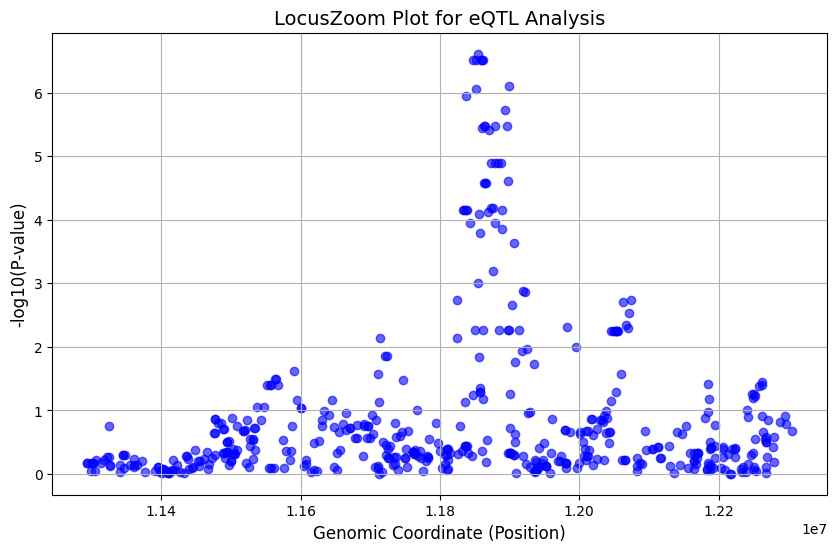

In [168]:
plot_locuszoom(cis_117)

## Data Prep for PRS

In order to run the PRS, we need to firstly organize our summary statistics into correct format. 

In [169]:
hm3snps = pd.read_csv('data/w_hm3.snplist',delimiter='\t')

In [172]:
import pandas as pd

# Assuming `eqtl_sumstats` and `hm3snps` are Pandas DataFrames

# Find matching SNP indices
snp_indices = cis_117['SNP'].map(hm3snps.set_index('SNP')['A1'])

# Extract A1 and A2 columns based on matched indices
A1 = hm3snps.set_index('SNP').loc[cis_117['SNP'], 'A1'].reset_index(drop=True)
A2 = hm3snps.set_index('SNP').loc[cis_117['SNP'], 'A2'].reset_index(drop=True)

# Add A1 and A2 as new columns in `eqtl_sumstats`
cis_117['A1'] = A1
cis_117['A2'] = A2

# Write the combined DataFrame to a text file
cis_117.to_csv("data/output/eqtl_sumstats.txt", index=False, sep='\t', header=True, quoting=3)


## Clump the data

Now we can clump the data, sometimes it said 'No variants remaining after --extract.', it is totally line since we are trying different parameters

In [188]:
%%bash
gene="ENSG00000177000"
for P in 0.05 0.01 0.001 0.00001; do
    ./plink \
        --bfile data/train_combined \
        --clump-p1 $P \
        --clump-r2 0.8 \
        --clump-kb 250 \
        --clump data/output/eqtl_sumstats.txt \
        --clump-snp-field SNP \
        --clump-field P-value \
        --out data/output/p${P}_gene${gene}
done

PLINK v1.9.0-b.7.6 64-bit (13 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/output/p0.05_geneENSG00000177000.log.
Options in effect:
  --bfile data/train_combined
  --clump data/output/eqtl_sumstats.txt
  --clump-field P-value
  --clump-kb 250
  --clump-p1 0.05
  --clump-r2 0.8
  --clump-snp-field SNP
  --out data/output/p0.05_geneENSG00000177000

32768 MB RAM detected; reserving 16384 MB for main workspace.
1190321 variants loaded from .bim file.
258 people (0 males, 0 females, 258 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data/output/p0.05_geneENSG00000177000.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 258 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848

In [190]:
%%bash
gene="ENSG00000177000"

for P in 0.05 0.01 0.001 0.00001; do
    
    # Define the clumped file and SNPs output file names based on r2 and P
    clumped_file="data/output/p${P}_gene${gene}.clumped"
    snp_list="data/prs/PRS.SNPs.p${P}_gene${gene}"

    # Extract SNPs from the clumped file
    awk 'NR!=1{print $3}' "$clumped_file" > "$snp_list"

    # Create new binary files for the PRS SNPs
    ./plink --bfile data/train_combined --extract "$snp_list" --make-bed --out "data/output/1000G_eur_PRS_p${P}_gene${gene}"
    
done

PLINK v1.9.0-b.7.6 64-bit (13 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/output/1000G_eur_PRS_p0.05_geneENSG00000177000.log.
Options in effect:
  --bfile data/train_combined
  --extract data/prs/PRS.SNPs.p0.05_geneENSG00000177000
  --make-bed
  --out data/output/1000G_eur_PRS_p0.05_geneENSG00000177000

32768 MB RAM detected; reserving 16384 MB for main workspace.
1190321 variants loaded from .bim file.
258 people (0 males, 0 females, 258 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
data/output/1000G_eur_PRS_p0.05_geneENSG00000177000.nosex .
--extract: 30 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 258 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182

## Create Score File
We can now create the score file to help us run the PRS

In [ ]:
import pandas as pd
import os

# Load the summary statistics DataFrame (eqtl_sumstats_all)
sumstats = pd.read_csv("data/output/eqtl_sumstats.txt", delimiter='\t')  # Replace with your actual file

# Define r2 and P values
P_values = ["0.05", "0.01", "0.001", "0.00001"]
gene='ENSG00000177000'

# Loop over each combination of r2 and P

for P in P_values:
    # Construct the file name for the SNP list
    snp_file = f"data/prs/PRS.SNPs.p{P}_gene{gene}"
        
        # Read the SNP list and filter out empty entries
    try:
        y = pd.read_csv(snp_file, header=None, names=["SNP"])["SNP"]
        y = y[y.str.len() > 0]  # Remove empty entries
    except FileNotFoundError:
        print(f"File not found: {snp_file}")
        continue

        # Match SNPs in SNP list with those in the sumstats DataFrame
    matched_indices = sumstats['SNP'].isin(y)
    matched_sumstats = sumstats.loc[matched_indices]

        # Ensure BETA corresponds to the correct allele (A2)
    score = matched_sumstats[['SNP', 'A1', 'Beta']]

        # Write the score file
    output_file = f"data/prs/p{P}_gene{gene}_score_file.txt"
    score.to_csv(output_file, index=False, header=False, sep="\t", quoting=3)  # quoting=3 -> No quotes

    print(f"Score file written: {output_file}")

Score file written: data/prs/p0.05_geneENSG00000177000_score_file.txt
Score file written: data/prs/p0.01_geneENSG00000177000_score_file.txt
Score file written: data/prs/p0.001_geneENSG00000177000_score_file.txt
Score file written: data/prs/p0.00001_geneENSG00000177000_score_file.txt


## Run PRS

Finally, it is the time to runt he PRS

In [200]:
%%bash
gene="ENSG00000177000"

for P in 0.05 0.01 0.001 0.00001; do
        # Define file names based on current r2 and P values
        #bfile_prefix="hw3/PRS_p${P}r${r2}"  # The bfile for each combination
    bfile_prefix="data/test_combined"
    score_file="data/prs/p${P}_gene${gene}_score_file.txt"  # The score file for each combination
    output_prefix="data/prs/prs_result/PRS_test_p${P}_gene${gene}"  # Output prefix for each combination

        # Run PLINK to calculate the PRS score
    ./plink --bfile "$bfile_prefix" --out "$output_prefix" --score "$score_file" 1 2 3
done


PLINK v1.9.0-b.7.6 64-bit (13 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/prs/prs_result/PRS_test_p0.05_geneENSG00000177000.log.
Options in effect:
  --bfile data/test_combined
  --out data/prs/prs_result/PRS_test_p0.05_geneENSG00000177000
  --score data/prs/p0.05_geneENSG00000177000_score_file.txt 1 2 3

32768 MB RAM detected; reserving 16384 MB for main workspace.
1190321 variants loaded from .bim file.
86 people (0 males, 0 females, 86 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
data/prs/prs_result/PRS_test_p0.05_geneENSG00000177000.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 86 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798

## Check the overfitting

Let's check the performance of PRS in our test set, the parameters we are using here is the squre of the correlation. 

In [221]:
one_prs = pd.read_csv("data/prs/prs_result/PRS_test_p0.01_geneENSG00000177000.profile", delim_whitespace=True)
test_geno = read_plink1_bin("data/test_combined.bed", "data/test_combined.bim", "data/test_combined.fam", verbose=False)
one_prs

,FID,IID,PHENO,CNT,CNT2,SCORE
0,HG00097,HG00097,-9,32,4,-0.000385
1,HG00102,HG00102,-9,32,3,-0.036736
2,HG00103,HG00103,-9,32,3,-0.031837
3,HG00111,HG00111,-9,32,3,0.030903
4,HG00120,HG00120,-9,32,18,-0.210338
...,...,...,...,...,...,...
81,NA20588,NA20588,-9,32,16,-0.116551
82,NA20759,NA20759,-9,32,14,-0.126597
83,NA20761,NA20761,-9,32,10,-0.166072
84,NA20811,NA20811,-9,32,2,-0.021762


In [228]:

P_values = ["0.05", "0.01", "0.001", "0.00001"]
pr_list = [0.01]
for i in P_values:
    each_prs = pd.read_csv(f"data/prs/prs_result/PRS_test_p{i}_geneENSG00000177000.profile", delim_whitespace=True)
    test_expression = expression[expression['gene'] == gene][each_prs['FID']].T.iloc[:,0]
    correlation = np.corrcoef(each_prs['SCORE'], test_expression)[0, 1]
    print(f'the square of correlation in the parameter of {i} is: ', correlation**2)
    

the square of correlation in the parameter of 0.05 is:  0.08186849295929985
the square of correlation in the parameter of 0.01 is:  0.09826771292907978
the square of correlation in the parameter of 0.001 is:  0.1074169607339782
the square of correlation in the parameter of 0.00001 is:  0.1081738960228224


## Result

In this case, we see that the if we set p = 0.00001, it has the best performance, whcih means the overfitting oes not happen in this case. 